<a href="https://colab.research.google.com/github/Pomoirab/ML/blob/main/Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing training dataset
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/msc_training_dataset.csv')

In [ ]:
#importing testing dataset
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/msc_testing_dataset.csv')

#Peforming quality check on the train data

In [ ]:
#checking the first five rows of the train data
train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105


In [ ]:
#checking the numbers of rows and columns in the train dataset
train.shape

(3000, 12)

The results show that there are 3000 rows 
and there are 12 columns in the train data

In [ ]:
#obtaining the number of duplicated datapoints in the train dataset
train.duplicated().sum()

488

This shows that there are 488 datapoints that are duplicates

In [ ]:
#obtaining the numbers of missing values in the train dataset
train.isnull().sum()

room            0
bathroom        0
kitchen         0
french_door     0
backyard        0
furnished       0
green_paint     0
solar_power     0
woodfloor       0
qlm_security    0
club_access     0
price           0
dtype: int64

This shows that there are no missing values in the dataset

In [ ]:
#obtaining basic information about the train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          3000 non-null   int64
 1   bathroom      3000 non-null   int64
 2   kitchen       3000 non-null   int64
 3   french_door   3000 non-null   int64
 4   backyard      3000 non-null   int64
 5   furnished     3000 non-null   int64
 6   green_paint   3000 non-null   int64
 7   solar_power   3000 non-null   int64
 8   woodfloor     3000 non-null   int64
 9   qlm_security  3000 non-null   int64
 10  club_access   3000 non-null   int64
 11  price         3000 non-null   int64
dtypes: int64(12)
memory usage: 281.4 KB


This shows that all parameters of the train data integer data types

# Peforming quality checks for test data

In [ ]:
#obtaining the first five rows of the test data
test.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,1,1,1,3,0,0,1,1,0,1,0,5068
1,5,1,1,2,0,0,0,0,0,1,1,7658
2,5,1,1,3,0,0,0,1,1,1,1,11318
3,4,2,2,1,0,1,1,0,0,1,0,8858
4,5,2,1,1,0,1,1,1,0,0,1,11178


In [ ]:
#obtaining the shape of the test dataset
test.shape

(999, 12)

The results show that there are 999 number of rows in the test data
and there are 12 columns in the test data

In [ ]:
#obtaining basic information about the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          999 non-null    int64
 1   bathroom      999 non-null    int64
 2   kitchen       999 non-null    int64
 3   french_door   999 non-null    int64
 4   backyard      999 non-null    int64
 5   furnished     999 non-null    int64
 6   green_paint   999 non-null    int64
 7   solar_power   999 non-null    int64
 8   woodfloor     999 non-null    int64
 9   qlm_security  999 non-null    int64
 10  club_access   999 non-null    int64
 11  price         999 non-null    int64
dtypes: int64(12)
memory usage: 93.8 KB


The result above shows that all the columns have values with integers 

In [ ]:
#obtaining the number of duplicated datapoints
test.duplicated().sum()

70

This shows that there are 70 duplicated values in the test dataset

In [ ]:
#obtaining the number of missing values in the test dataset
test.isnull().sum()

room            0
bathroom        0
kitchen         0
french_door     0
backyard        0
furnished       0
green_paint     0
solar_power     0
woodfloor       0
qlm_security    0
club_access     0
price           0
dtype: int64

The result shows that there are no missing values in the test dataset

#Joining both train and test data

In [ ]:
###Creating a list for the test and train data
frames = [ train, test]

In [ ]:
# Joining together the test and train data
data = pd.concat(frames)

In [ ]:
#obtaining the first few rows of the dataset
data.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105


In [ ]:
#obtaining the last few rows of the dataset
data.tail()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
994,5,2,2,3,1,1,0,0,0,0,0,10088
995,5,1,2,3,1,1,0,0,0,0,0,9788
996,3,2,2,1,0,1,1,1,0,1,0,9388
997,3,2,1,1,1,0,0,1,1,0,0,8528
998,2,1,2,1,0,1,1,0,0,0,0,6118


In [ ]:
#obtaining the shape of the joined dataframe
data.shape

(3999, 12)

This shows that the joined test and train data has 3999 ros and 12 columns

In [ ]:
#obtaining summary statistics of the joined dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
room,3999.0,2.997249,1.421532,1.0,2.0,3.0,4.0,5.0
bathroom,3999.0,1.489622,0.499955,1.0,1.0,1.0,2.0,2.0
kitchen,3999.0,1.515629,0.499818,1.0,1.0,2.0,2.0,2.0
french_door,3999.0,1.988747,0.812375,1.0,1.0,2.0,3.0,3.0
backyard,3999.0,0.495374,0.500041,0.0,0.0,0.0,1.0,1.0
furnished,3999.0,0.485121,0.499841,0.0,0.0,0.0,1.0,1.0
green_paint,3999.0,0.494624,0.500034,0.0,0.0,0.0,1.0,1.0
solar_power,3999.0,0.494374,0.500031,0.0,0.0,0.0,1.0,1.0
woodfloor,3999.0,0.509627,0.499970,0.0,0.0,1.0,1.0,1.0
qlm_security,3999.0,0.485621,0.499856,0.0,0.0,0.0,1.0,1.0


The results show that there are no missing values in the dataset as the columns all have a count of 3999

The Data from backyard, furnished, green_paint, solar_power, woodfloor, QLM_security and club access are boolean in nature as they have values as either 0 or 1

There is no apartment with more than two kitchens

There are no apartments having more than two bathrooms

The mean price of the apartments in the combined test and train dataset is 8605

There are no apartments that have more than five rooms

#Descriptive statistics

Univariate Analysis

In [ ]:
#using a user defined function to obtain histogram and boxplot to visualize numeric columns
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

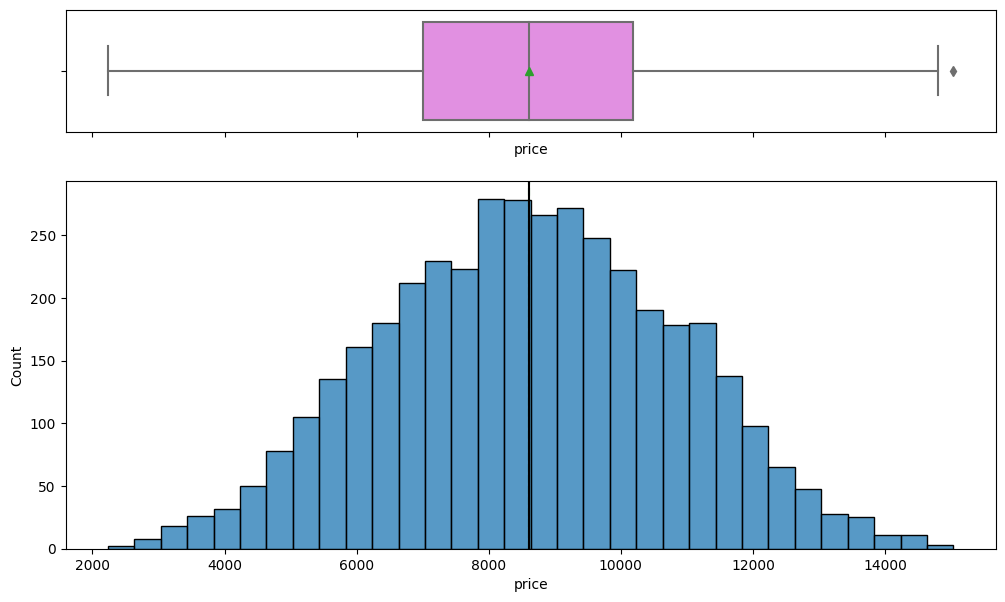

In [ ]:
#histogram and boxplot of price
histogram_boxplot(data, 'price')

This shows that the distribution of the prices is estimated as normal
The boxplot shows that there are outliers in the dataset

In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

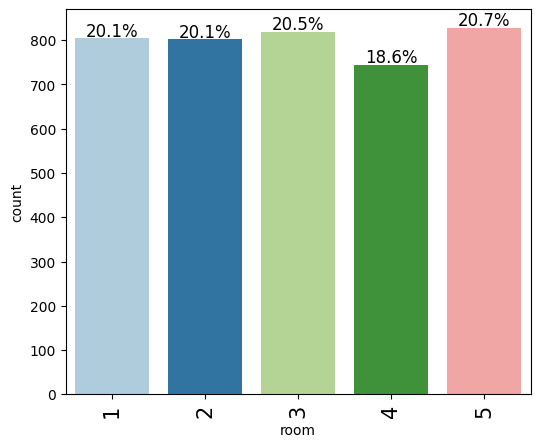

In [ ]:
#barchart for club access
labeled_barplot(data, 'room', perc = True)

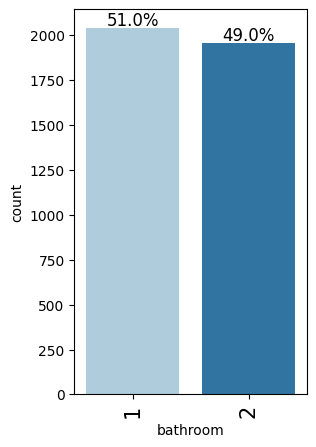

In [ ]:
#barchart for club access
labeled_barplot(data, 'bathroom', perc = True)

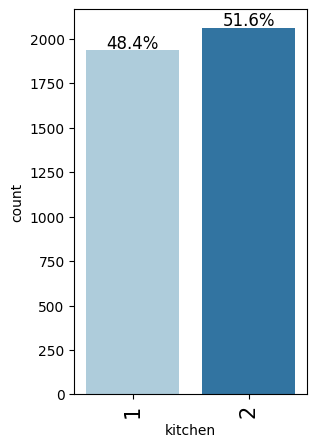

In [ ]:
#barchart for club access
labeled_barplot(data, 'kitchen', perc = True)

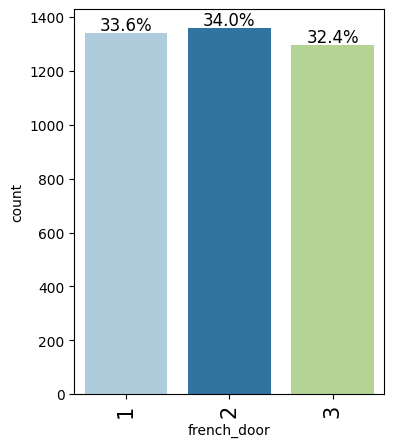

In [ ]:
#barchart for club access
labeled_barplot(data, 'french_door', perc = True)

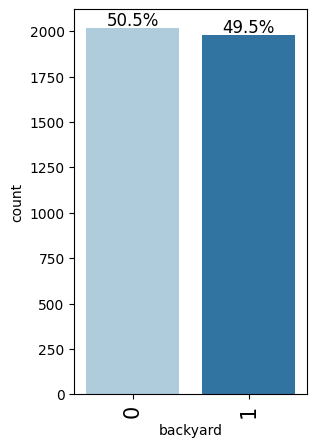

In [ ]:
#barchart for club access
labeled_barplot(data, 'backyard', perc = True)

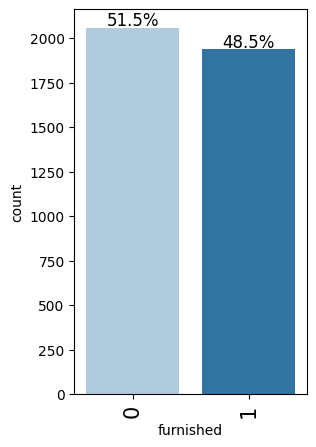

In [ ]:
#barchart for club access
labeled_barplot(data, 'furnished', perc = True)

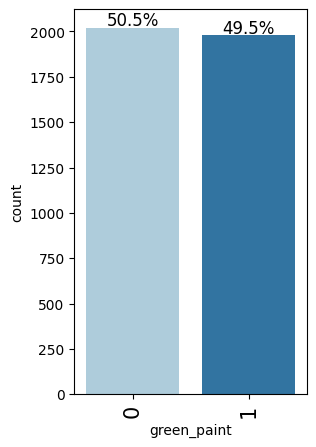

In [ ]:
#barchart for club access
labeled_barplot(data, 'green_paint', perc = True)

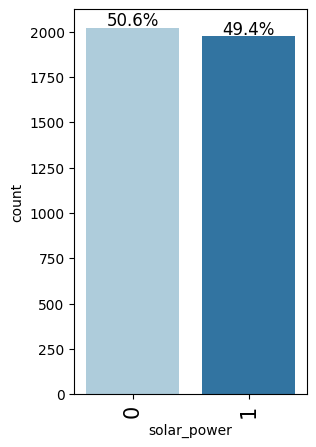

In [ ]:
#barchart for club access
labeled_barplot(data, 'solar_power', perc = True)

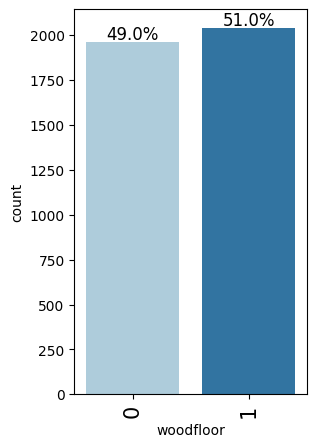

In [ ]:
#barchart for club access
labeled_barplot(data, 'woodfloor', perc = True)

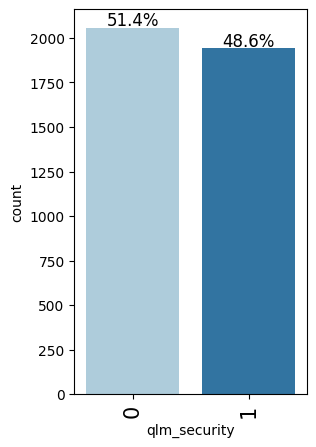

In [ ]:
#barchart for club access
labeled_barplot(data, 'qlm_security', perc = True)

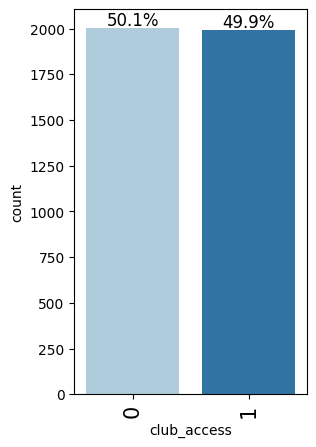

In [ ]:
#barchart for club access
labeled_barplot(data, 'club_access', perc = True)

#Bi-variate analysis

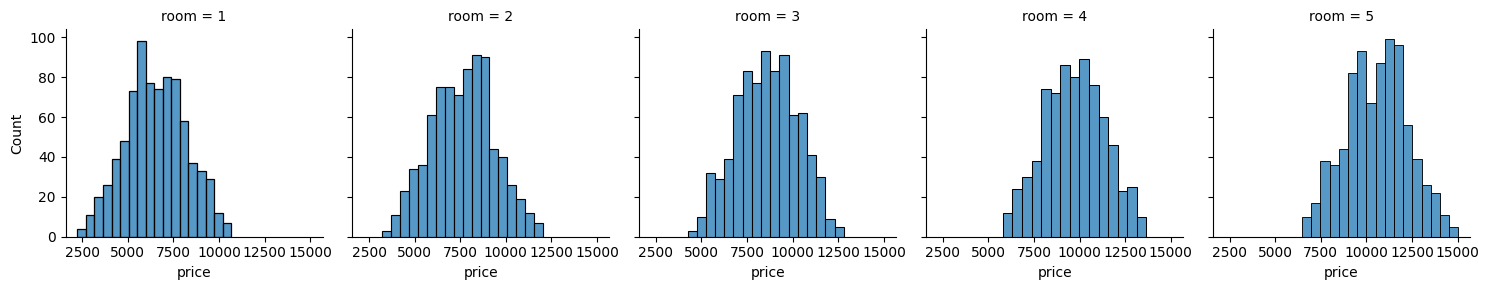

In [ ]:
g= sns.FacetGrid(data=data, col = 'room');
g.map(sns.histplot, 'price');

The lower the number of rooms in an apartment, the lower their price
the higher the number of rooms, the higher the price they attract

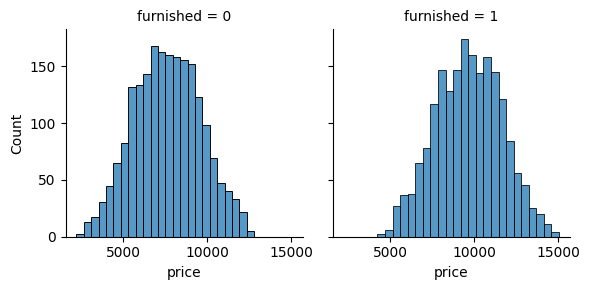

In [ ]:
g= sns.FacetGrid(data=data, col = 'furnished');
g.map(sns.histplot, 'price');

Furnished houses attracts more prices than un-furnished house

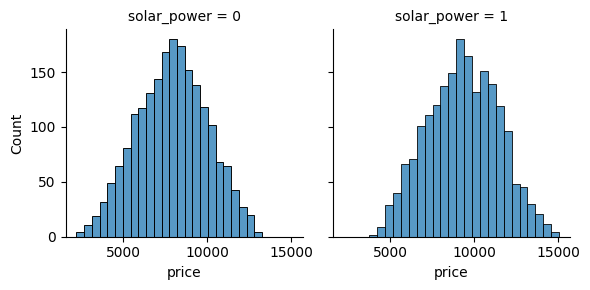

In [ ]:
g= sns.FacetGrid(data=data, col = 'solar_power');
g.map(sns.histplot, 'price');

apartments that are solar powered attract higher prices than those without solar power

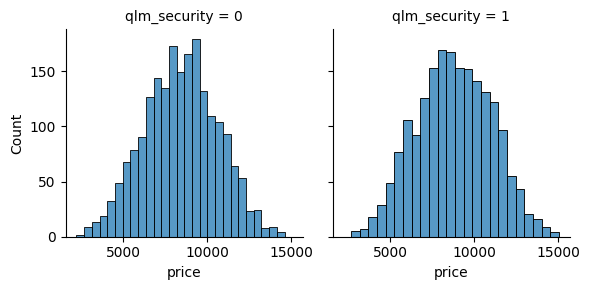

In [ ]:
g= sns.FacetGrid(data=data, col = 'qlm_security');
g.map(sns.histplot, 'price');

There is no significant difference on price of apartments with qlm_security and those without it

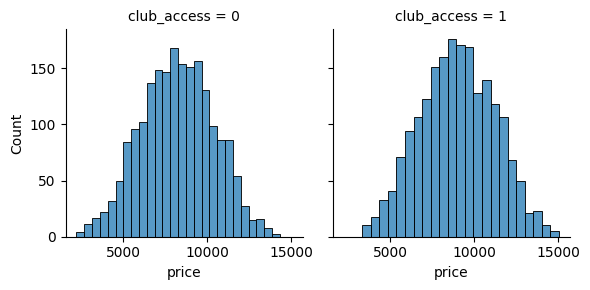

In [ ]:
g= sns.FacetGrid(data=data, col = 'club_access');
g.map(sns.histplot, 'price');

there is no signicant difference on price between apartments that have club access and those who do not have club access

#Multi-variate analysis

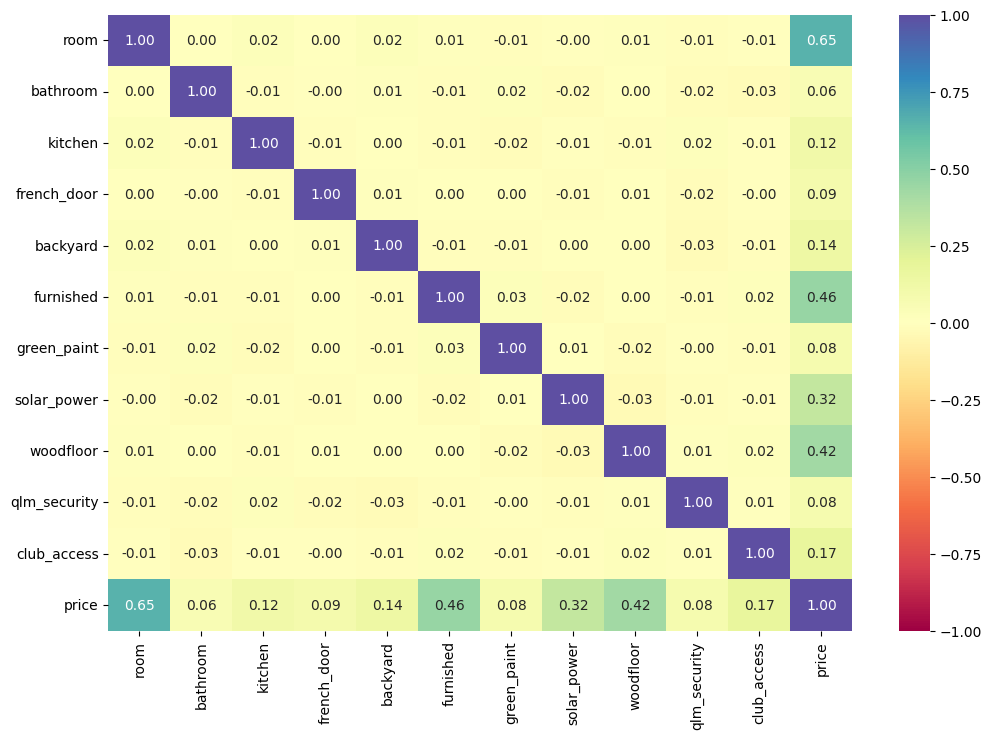

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Price and number of rooms have the highest positive correlation
Price and qlm_security has the least correlation
other independent variables have very low correlation between each other
furnished, solar power and woodfloor have medium correlation with price

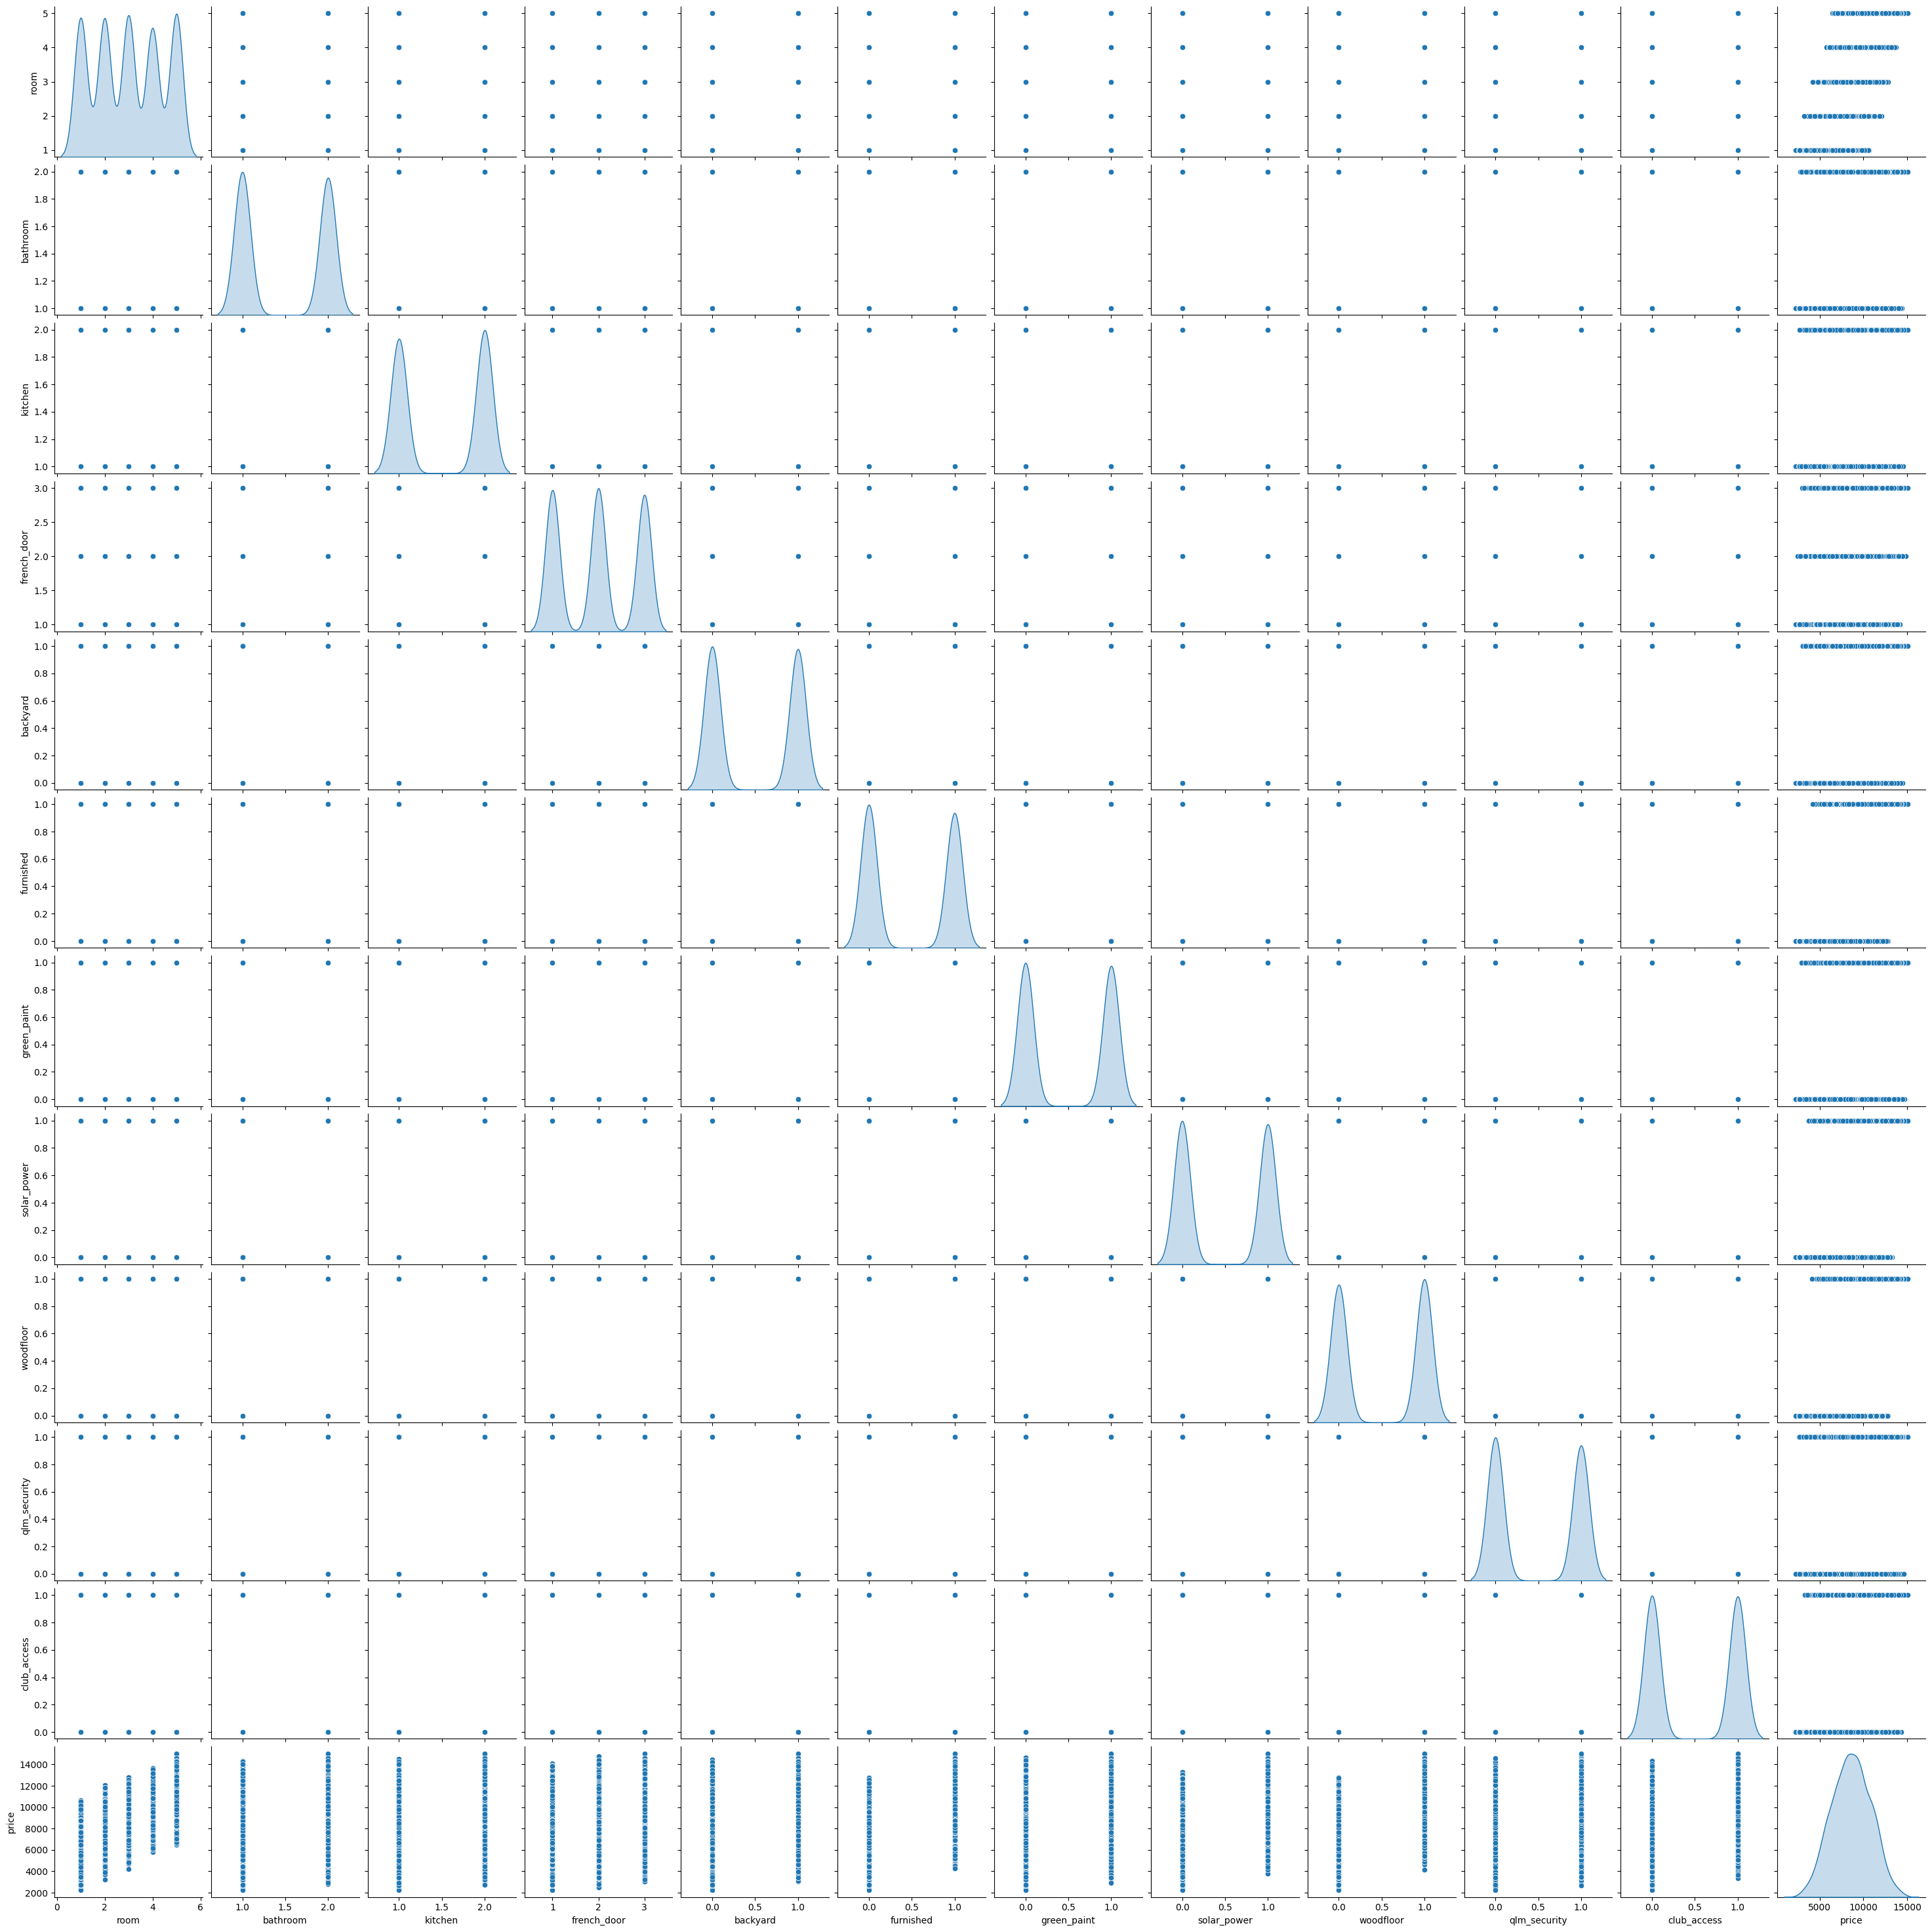

In [ ]:
sns.pairplot(data=data, diag_kind="kde")

plt.show()

the distribution of price is fairly normal
all independent variable have multi-modal distributions

# Checking for linearity

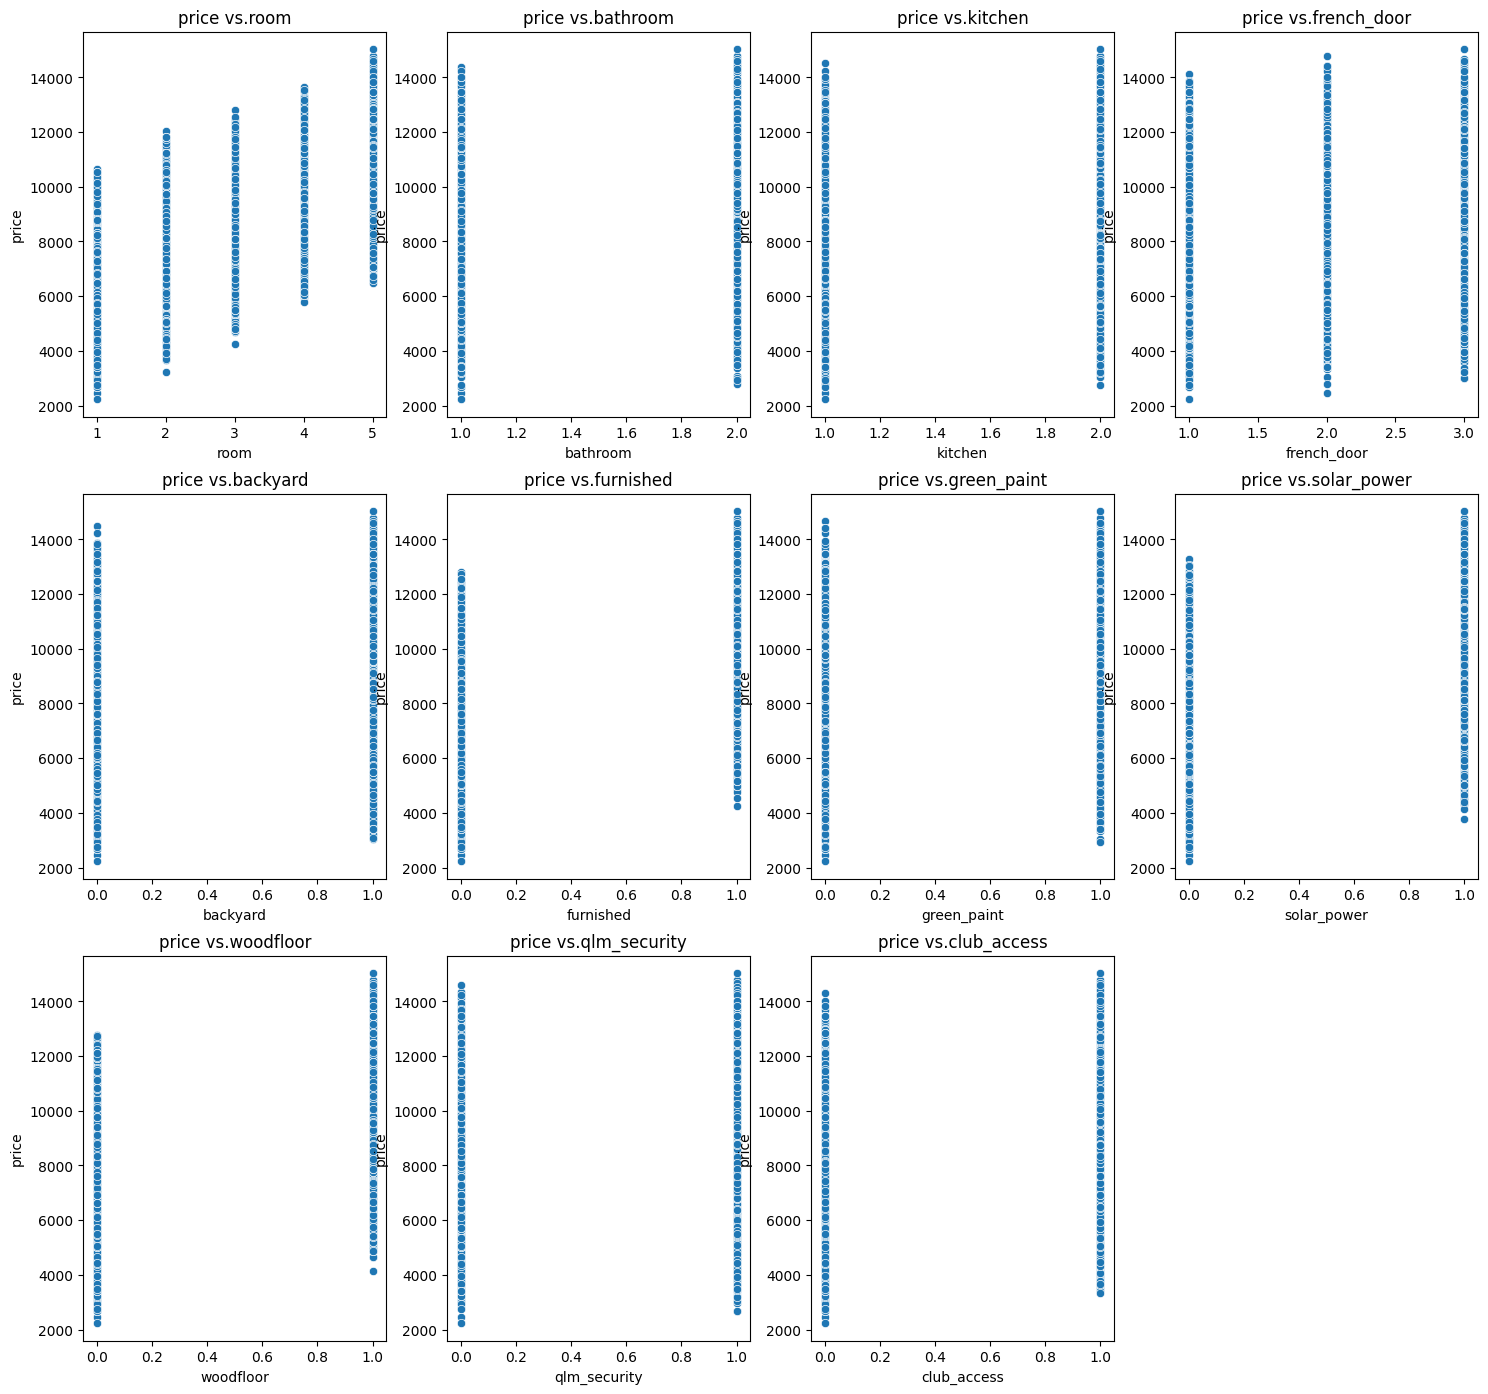

In [ ]:
# checking Linearity between dependent and independent variable

plt.figure(figsize=(18,17));

pos = 1

for i in data:
    
    if i!='price':
        
        plt.subplot(3, 4, pos)
        plt.title("price vs."+i)
        
#         sns.regplot(x=i,y='rating',data=data, line_kws={"color": "red"}, ci=None)
        sns.scatterplot(x=i, y='price', data=data)
        pos += 1

none of the independent variuables show linearity with price
one of the condition of linear regression is not met
Linear regression cannot be used to predict price on the dataset
Decision tree regressor would be employed to predict prices of an apartment

# Removal of Duplicate rows in test and train data

In [ ]:
# dropping the duplicates in train dataset
train_D = train.drop_duplicates(keep = 'first', ignore_index=True)

In [ ]:
# dropping the duplicates in test dataset
test_D = test.drop_duplicates(keep = 'first', ignore_index=True)

# Decision Tree

In [ ]:
# Splititng the dataset for the test and training model

X_train = train_D.drop(['price'],axis=1)
y_train = train_D["price"]

X_test = test_D.drop(['price'],axis=1)
y_test = test_D["price"]

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_r2=metrics.r2_score(y_train,pred_train)
    test_r2=metrics.r2_score(y_test,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaure on training set : ",metrics.r2_score(y_train,pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))
    
    # returning the list with train and test scores
    return score_list

In [ ]:
#fitting decision tree regressor
dtree=DecisionTreeRegressor(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [ ]:
#obtaining performance on training data
dtree_model_train_perf=model_performance_regression(dtree, X_train,y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    RMSE  MAE  R-squared  Adj. R-squared  MAPE
0   0.0  0.0        1.0             1.0   0.0


Ajusted R2 of 0.98 indicates the model efficiency in estimating predicted values correctly

# Feature importance

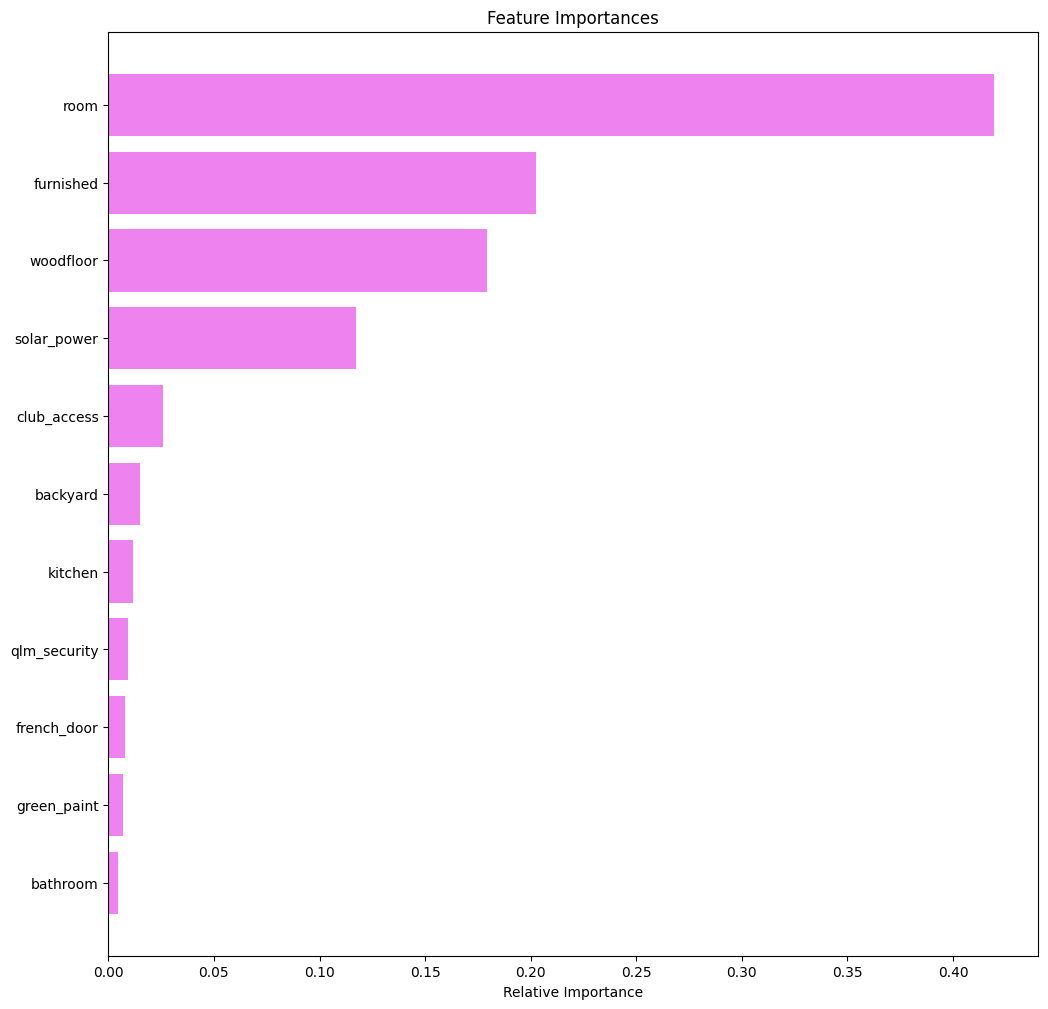

In [ ]:
#obtaining the relative importance of each feature to estimating price
feature_names = X_train.columns 
importances = dtree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

room has the highest relative importance of about 40% to 45% influence on estimating the prices of apartments
Furnshed and woodfloor have about 20% influence to estimating houses of an apartment
Bathroom, club access, backyard, kitchen, security, french door, green paint have less than 5% importance to estimating prices of apartments

# Predicting values of Apartments on test data

In [ ]:
# obtaining a list of predicted prices on the test dataset
price_pred = dtree.predict(X_test)

In [ ]:
#obtaining the predicted prices in a dataframe
prediction = pd.DataFrame(price_pred)

In [ ]:
#checking the first and last five rows of predicted house prices
print(prediction)

           0
0     5355.0
1     7645.0
2    11305.0
3     8845.0
4    11165.0
..       ...
924  10145.0
925   9775.0
926   9315.0
927   8515.0
928   6585.0

[929 rows x 1 columns]


In [ ]:
#merging predicted house prices with test dataset which has no duplicate rows
test_prediction = pd.merge(test_D, prediction, how = 'outer', left_index = True, right_index = True)

In [ ]:
#renaming the column of the predicted hopuse prices
test_prediction = test_prediction.rename(columns = {test_prediction.columns[-1]: "Predicted_price"})

In [ ]:
#checking the first an last five rows of the new dataframe which shows predicted prices and test dataset
test_prediction

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price,Predicted_price
0,1,1,1,3,0,0,1,1,0,1,0,5068,5355.0
1,5,1,1,2,0,0,0,0,0,1,1,7658,7645.0
2,5,1,1,3,0,0,0,1,1,1,1,11318,11305.0
3,4,2,2,1,0,1,1,0,0,1,0,8858,8845.0
4,5,2,1,1,0,1,1,1,0,0,1,11178,11165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,5,2,1,2,1,1,0,0,0,1,0,9788,10145.0
925,5,2,2,3,1,1,0,0,0,0,0,10088,9775.0
926,3,2,2,1,0,1,1,1,0,1,0,9388,9315.0
927,3,2,1,1,1,0,0,1,1,0,0,8528,8515.0
